In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.callbacks import CSVLogger
from keras.applications.vgg16 import VGG16

EPOCHS = 30
BATCH_SIZE = 32
IMAGE_SIZE = 32
NUM_CLASSES = 10
LEARNING_RATE = 1e-3

#Import dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#Build model
base_model = VGG16(include_top=True, weights=None, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), pooling="avg")
x = base_model.layers[-2].output
output_layer = Dense(NUM_CLASSES, activation="softmax", name="prediction")(x)
model = Model(inputs = base_model.input, outputs = output_layer)
model.summary()

#Set loss function and optimizer
model.compile(optimizer=SGD(lr=LEARNING_RATE), loss="categorical_crossentropy", metrics=["acc"])

#Set callback to record info
hisRecord = CSVLogger("Info.log", separator=",")

#Train model
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[hisRecord])
model.save("cifar10_vgg16.h5")

Model: "functional_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

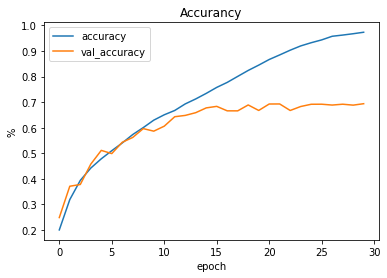

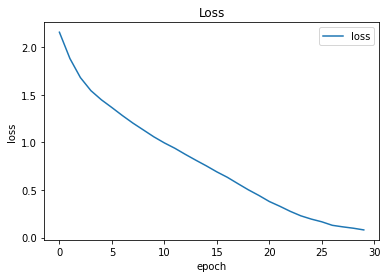

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = r"/content/Info.log"

accuracy = []
loss = []
val_accuracy = []

log_file = open(CSV_PATH, "r")
for row in log_file:
    column = row.split(",")
    if column[0].isdigit() == False: continue

    accuracy.append(float(column[1]))
    loss.append(float(column[2]))    
    val_accuracy.append(float(column[3]))    
    
df = pd.DataFrame()
df["accuracy"] = accuracy
df["loss"] = loss
df["val_accuracy"] = val_accuracy

plt.plot(df["accuracy"], label = "accuracy")
plt.plot(df["val_accuracy"], label = "val_accuracy")
plt.title("Accurancy")
plt.ylabel("%")
plt.xlabel("epoch")
plt.legend()
plt.savefig('Accurancy.png')
plt.show()

plt.plot(df["loss"], label = "loss")
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.savefig('loss.png')
plt.show()

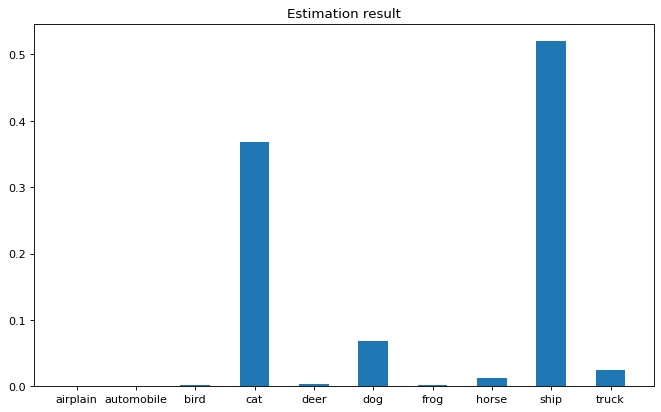

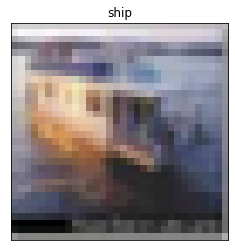

In [ ]:
import numpy as np
from keras.models import load_model

INDEX = 6000
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

model = load_model("/content/cifar10_vgg16.h5")
probabilities = model.predict(x_test)

plt.figure(figsize=(10, 6), dpi=80)
plt.bar(["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"], list(probabilities[INDEX]), 0.5)
plt.title("Estimation result")
x_test = x_test.astype(np.uint8)
plt.figure()
plt.imshow(x_test[INDEX])
title = LABELS[list(y_test[INDEX]).index(1)]
plt.title(title, fontsize=12)
plt.xticks([])
plt.yticks([])        
plt.show()